In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import squarify
import datetime
from dateutil.relativedelta import *
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')

In [ ]:
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1\. visualizzare il numero totale di record presenti nel file

In [ ]:
df.index.max()

5282

2\. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ').title(), 'numero_dosi'].count()

Inserisci in nome di una regione: lombardia


264

3\. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
user_input = input('Inserisci in nome di una regione: ').title()
n = df['nome_area'].str.contains(user_input).sum()

if n > 0:
  print(df.loc[df['nome_area'] == user_input, 'numero_dosi'].count())
else:
  print('La regione inserita non esiste!')

Inserisci in nome di una regione: lombardia
264


4\. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
print(df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ').title(), 'numero_dosi'].sum())

Inserisci in nome di una regione: lombardia
17274689


5\. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'})

,fornitore,numero_dosi
0,Janssen,1846104
1,Moderna,15235940
2,Pfizer/BioNTech,71327408
3,Vaxzevria (AstraZeneca),11544591


6\. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
data = df[df['nome_area'] == input('Inserisci in nome di una regione: ').title()]
data = data.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
data

Inserisci in nome di una regione: lombardia


,fornitore,numero_dosi
2,Pfizer/BioNTech,12089444
1,Moderna,2685369
3,Vaxzevria (AstraZeneca),2190389
0,Janssen,309487


7\. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(data['fornitore'], data['numero_dosi'].values)
fig.autofmt_xdate(rotation=45)



NameError: ignored

8\. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

array([12089444,  2685369,  2190389,   309487])

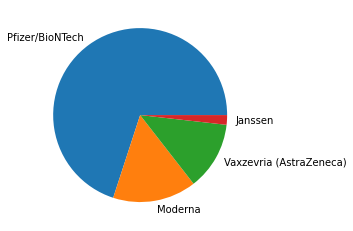

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.pie(data['numero_dosi'].values, labels=data['fornitore'])

data['numero_dosi'].values

9\. visualizzare le informazioni dell'esercizio 6 con un grafico treemap

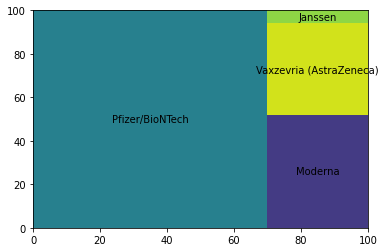

In [ ]:
squarify.plot(sizes=data['numero_dosi'], label=data['fornitore'])
plt.show()

10\. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
data = df.groupby('nome_area', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
data.head(3)

,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332809
3,Campania,9179718


11\. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [ ]:
data[data['numero_dosi'] < data['numero_dosi'].mean()]

,nome_area,numero_dosi
2,Calabria,2902284
15,Sardegna,2751776
7,Liguria,2547002
9,Marche,2507456
0,Abruzzo,2267252
5,Friuli-Venezia Giulia,2031903
18,Umbria,1469397
1,Basilicata,936665
13,Provincia Autonoma Trento,878910
12,Provincia Autonoma Bolzano / Bozen,793879


12\. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

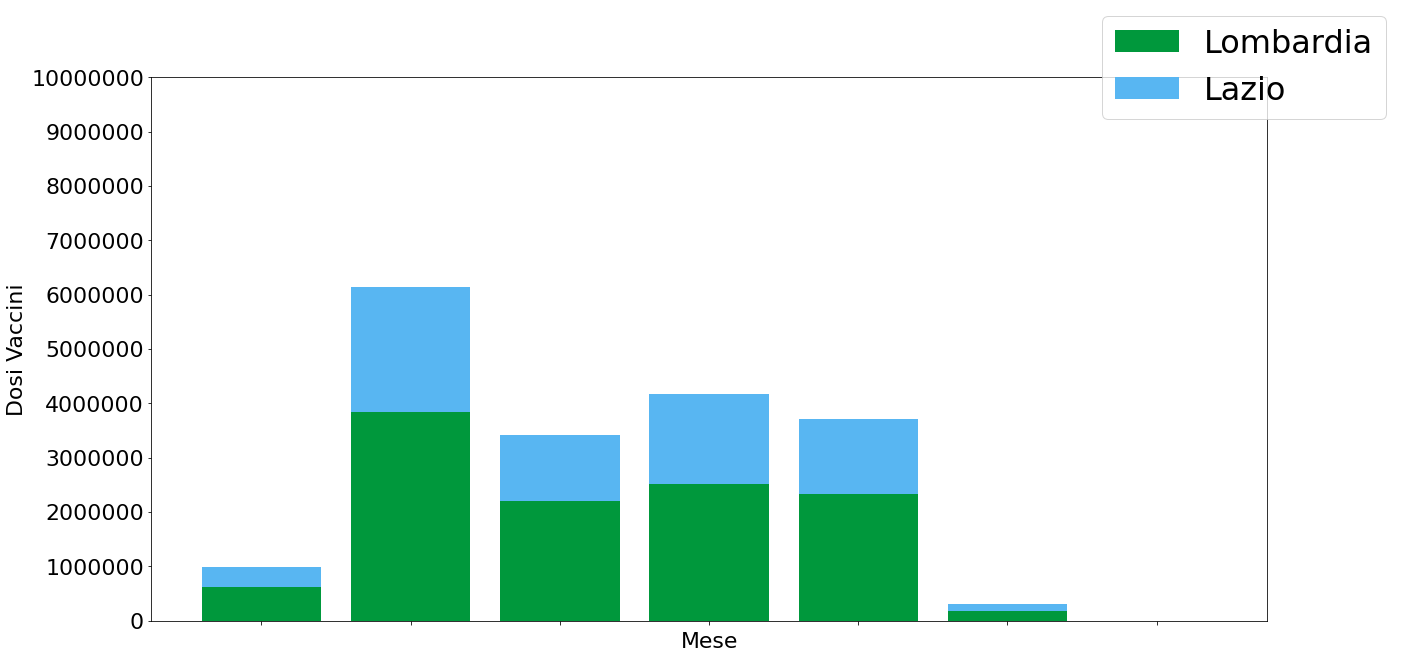

In [ ]:
matplotlib.rcParams.update({'font.size': 22})

df['data_consegna'] = pd.to_datetime(df['data_consegna']).dt.date

data = df.groupby(['nome_area', 'data_consegna'], as_index=False).agg({'numero_dosi': 'sum'})
data = data[(data['nome_area'] == 'Lazio') | (data['nome_area'] == 'Lombardia')]

def calctime(t):
  t = datetime.datetime.strptime(str(t), '%Y-%m-%d')
  past = datetime.datetime.now() - relativedelta(months=6)
  return past<t

check_values = data['data_consegna'].apply(calctime)
data = data[check_values.values == True]

data['month'] = pd.to_datetime(data['data_consegna']).dt.month
data = data.groupby(['nome_area', 'month'], as_index=False).agg({'numero_dosi': 'sum', 'data_consegna': 'first'})


# Plot
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

lables_lombardia = data.loc[data['nome_area'] == 'Lombardia', 'month'].values
labels_lazio = data.loc[data['nome_area'] == 'Lazio', 'month'].values

values_lombardia = data.loc[data['nome_area'] == 'Lombardia', 'numero_dosi'].values
values_lazio = data.loc[data['nome_area'] == 'Lazio', 'numero_dosi'].values

ax.bar(lables_lombardia, values_lombardia, label='Lombardia', color='#00983c')
ax.bar(labels_lazio, values_lazio, bottom=values_lombardia, label='Lazio', color='#58b6f2')

fig.legend(prop={'size': 32})
ax.set_xlabel('Mese')
ax.set_ylabel('Dosi Vaccini')
ax.set_ylim([0, 10000000])
ax.set_yticklabels(np.arange(0, 10000001, step=1000000))
ax.set_yticks(np.arange(0, 10000001, step=1000000))
ax.set_xticklabels([])

plt.show()